In [1]:
# Install the RDKit library (used for cheminformatics and molecule handling)
!pip install rdkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 21.6 MB/s eta 0:00:00


We will need to import the required libraries to our space.

In [3]:
# Standard library imports
import time                              # For timing and delays
from pathlib import Path                 # For handling file system paths
from urllib.parse import quote           # For URL encoding

# IPython display utilities (for rich outputs in notebooks)
from IPython.display import Markdown, Image

# Third-party libraries
import requests                          # For making HTTP requests
import pandas as pd                      # For data manipulation and analysis

# RDKit (cheminformatics toolkit)
from rdkit import Chem                                  # Core RDKit module
from rdkit.Chem import PandasTools                      # Utilities for integ


# Fetching PubChem CID for the compound of interest

In [4]:
# Retrieve the PubChem CID (Compound ID) for a given compound name
name = "fluconazole"

# Construct the PubChem PUG REST API URL
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/cids/JSON"

# Send a GET request to the PubChem API
r = requests.get(url)
r.raise_for_status()  # Raise an error if the request failed

# Parse the JSON response
response = r.json()

# Extract the CID if available; otherwise, raise an error
if "IdentifierList" in response:
    cid = response["IdentifierList"]["CID"][0]
else:
    raise ValueError(f"Could not find matches for compound: {name}")

# Display the CID
print(f"PubChem CID for {name} is:\n{cid}")

# NBVAL_CHECK_OUTPUT — used for output validation in some notebook testing environments


PubChem CID for fluconazole is:
3365


# Extract molecular properties for a respective PubChem CID
We extract interesting properties for a compound using PubChem CID, such as molecular weight, pKd, logP, etc. Here, we will search for the molecular weight for Olaparib. You are suggested to edit the script for a particular property, below, I am showing you only **Molecular weight**.

In [5]:
# Retrieve the molecular weight for a compound using its PubChem CID
# Example: CID 3365 corresponds to olaparib
url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/3365/property/MolecularWeight/JSON"

# Send a GET request to the PubChem API
r = requests.get(url)
r.raise_for_status()  # Raise an error if the request failed

# Parse the JSON response
response = r.json()

# Extract the molecular weight if available; otherwise, raise an error
if "PropertyTable" in response:
    mol_weight = response["PropertyTable"]["Properties"][0]["MolecularWeight"]
else:
    raise ValueError(f"Could not find matches for PubChem CID: {cid}")

# Display the molecular weight
print(f"Molecular weight for {name} is:\n{mol_weight}")

# NBVAL_CHECK_OUTPUT — used for output validation in some notebook testing environments


Molecular weight for fluconazole is:
306.27


# Show me the 2D structure of my compound

The 2D structure of Olaparib:

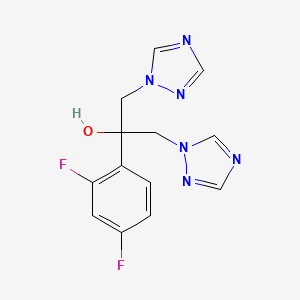

In [6]:
# Retrieve the 2D PNG image of a compound from PubChem using its CID
# Example: CID 3365 corresponds to olaparib
url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/3365/PNG"

# Send a GET request to the PubChem API
r = requests.get(url)
r.raise_for_status()  # Raise an error if the request failed

# Display the image with a markdown caption
display(Markdown("The 2D structure of Olaparib:"))
display(Image(r.content))


# Search of Query compounds for similarity search
The below script will perform the Tanimoto-based similarity search. The 2D PubChem fingerprints will be calculated first. For more information, abount fingerprints, it is highly advised to read (https://jcheminf.biomedcentral.com/articles/10.1186/s13321-016-0163-1).

# Fetching of Query Compound

The structure of Fluconazole:


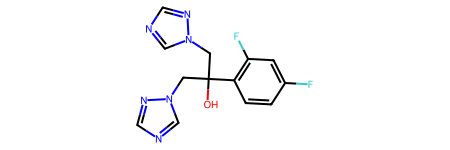

In [7]:
query = "C1=CC(=C(C=C1F)F)C(CN2C=NC=N2)(CN3C=NC=N3)O"
print("The structure of Fluconazole:")
Chem.MolFromSmiles(query)

# Creating a job key
The following script will create a job key as per your requiremnts. You can adjust the similarity threshould, and n_recods you expect. In this example we are using threshould value of 75, and n_record value of 10.

In [8]:
# RDKit imports for molecular structures and fingerprints
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

def calcular_similaridade(smiles1, smiles2):
    """
    Calculates the Tanimoto similarity between two compounds represented by SMILES strings.

    Parameters:
    - smiles1: str, SMILES of the first compound.
    - smiles2: str, SMILES of the second compound.

    Returns:
    - similaridade: float, similarity score between 0 and 1.
    - porcentagem: float, similarity expressed as a percentage (0% to 100%).
    """
    # Convert SMILES strings to RDKit molecule objects
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    # Validate molecules
    if mol1 is None or mol2 is None:
        raise ValueError("One or both provided SMILES strings are invalid.")

    # Generate molecular fingerprints
    fp1 = FingerprintMols.FingerprintMol(mol1)
    fp2 = FingerprintMols.FingerprintMol(mol2)

    # Compute Tanimoto similarity
    similaridade = DataStructs.FingerprintSimilarity(fp1, fp2)
    porcentagem = similaridade * 100

    return similaridade, porcentagem

# Example usage
smiles_referencia = "CC(C)N=C1C=C2C(=NC3=CC=CC=C3N2C4=CC=C(C=C4)Cl)C=C1NC5=CC=C(C=C5)Cl"
smiles_composto   = "CN(C)CCCN=C1C=C2C(=NC3=CC=CC=C3N2C4=CC=C(C=C4)Cl)C=C1NC5=CC=C(C=C5)Cl"

# Calculate similarity
similaridade, porcentagem = calcular_similaridade(smiles_referencia, smiles_composto)

# Output results
print(f"Tanimoto similarity: {similaridade:.2f}")
print(f"Similarity percentage: {porcentagem:.2f}%")


Tanimoto similarity: 0.98
Similarity percentage: 98.49%


In [ ]:
# Import required libraries
import pandas as pd
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

def calcular_similaridade(smiles1, smiles2):
    """
    Computes the Tanimoto similarity between two SMILES strings.

    Parameters:
    - smiles1: str, SMILES representation of the first compound.
    - smiles2: str, SMILES representation of the second compound.

    Returns:
    - float similarity score (0 to 1), or None if either SMILES is invalid.
    """
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)

    if mol1 is None or mol2 is None:
        return None  # Return None for invalid SMILES inputs

    fp1 = FingerprintMols.FingerprintMol(mol1)
    fp2 = FingerprintMols.FingerprintMol(mol2)

    sim = DataStructs.FingerprintSimilarity(fp1, fp2)
    return sim

def calcular_similaridades_csv(arquivo_csv, smiles_referencia, nome_saida='similaridades.csv'):
    """
    Calculates the Tanimoto similarity between a reference compound and a list of compounds in a CSV file.

    Parameters:
    - arquivo_csv: str, path to input CSV file containing a column named 'SMILES'.
    - smiles_referencia: str, reference SMILES string to compare against.
    - nome_saida: str, name of the output CSV file (default is 'similaridades.csv').

    Outputs:
    - A CSV file with similarity scores and similarity percentages.
    """
    # Load CSV file
    df = pd.read_csv(arquivo_csv)

    # Ensure the CSV contains a 'SMILES' column
    if 'SMILES_Canonical' not in df.columns:
        raise ValueError("The CSV file must contain a column named 'SMILES'.")

    # Compute similarity for each row
    similaridades = []
    for s in df['SMILES_Canonical']:
        sim = calcular_similaridade(smiles_referencia, s)
        similaridades.append(sim)

    # Add results to the dataframe
    df['Similarity'] = similaridades
    df['Similarity (%)'] = df['Similarity'].apply(lambda x: round(x * 100, 2) if x is not None else None)

    # Save results to a new CSV file
    df.to_csv(nome_saida, index=False)
    print(f"File saved as: {nome_saida}")

# Reference compound
smiles_ref = "C1=CC(=C(C=C1F)F)C(CN2C=NC=N2)(CN3C=NC=N3)O"

# Run similarity calculation
calcular_similaridades_csv(
    "/content/validation_smiles_canonical_fluconazole.csv",
    smiles_ref,
    nome_saida="resultado_similaridades_analogos_Fluconazol_ZINC22.csv"
)


###References

https://github.com/Ash100